Acquisition and Analysis of Neural Data 

Exercise 05

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from estimate_decoder import estimate_decoder

sns.set(style="darkgrid", context="talk", palette="pastel")
plt.style.use('seaborn')

(a)

In [2]:
T = 500
var = 2
del_t = 5e-3 

t = np.arange(0, T, del_t)
n_samples = int(T / del_t)

In [3]:
white_stim = np.random.normal(0, np.sqrt(var/del_t), n_samples)

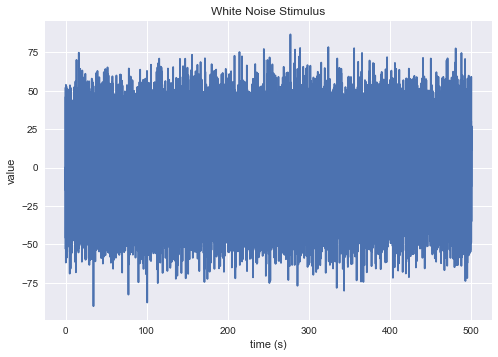

In [4]:
plt.plot(t, white_stim)
plt.title('White Noise Stimulus')
plt.xlabel('time (s)')
plt.ylabel('value')
plt.show()

(b)

In [5]:
def get_r_est(r0, kernel, stimulus, del_t):
    return r0 + np.convolve(kernel, stimulus) * del_t

In [6]:
def d_kernel(time_points, A = 200, tau_cos = 20e-3, sigma_cos = 140e-3, sigma_exp = 60e-3):
    return A*np.cos(2*np.pi*(time_points - tau_cos)/sigma_cos)*np.exp(-time_points/sigma_exp)

In [7]:
r0 = 150
d_kern = d_kernel(t)

In [8]:
r_est = get_r_est(r0, d_kern, white_stim, del_t)[:n_samples]

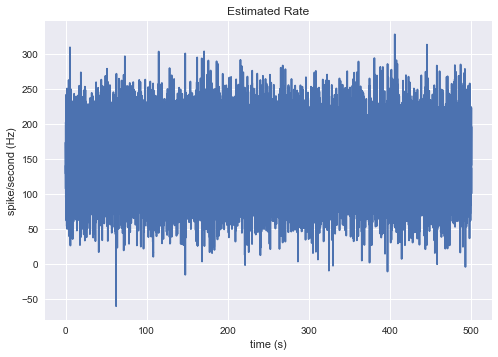

mean of estimated rate: 149.96287916412555


In [9]:
plt.plot(t, r_est)
plt.title('Estimated Rate')
plt.xlabel('time (s)')
plt.ylabel('spike/second (Hz)')
plt.show()

print('mean of estimated rate: {}'.format(np.mean(r_est)))

(c)

In [10]:
def plot_autocorrelation(series, max_t, norm_val = 1,  title = 'Autocorrelation', ylims = (-1,1), xlims=(-2,2)):
    corr = np.correlate(series.ravel(), series.ravel(), 'same') * norm_val
    t = np.linspace(-0.5*max_t, 0.5*max_t, corr.shape[0])

    fig, ax = plt.subplots(2,1, figsize=(6,8))
    fig.suptitle(title)
    ax[0].plot(t, corr)
    ax[0].set_xlabel('τ (s)')
    ax[0].set_title('Full Plot')

    ax[1].plot(t, corr)
    ax[1].set_xlabel('τ (s)')
    ax[1].set_ylim(ylims[0],ylims[1])
    ax[1].set_xlim(xlims[0],xlims[1])
    ax[1].set_title('Zoomed Plot')

    fig.tight_layout()
    plt.show()

    return corr

In [11]:
a_corr = r_est - r0

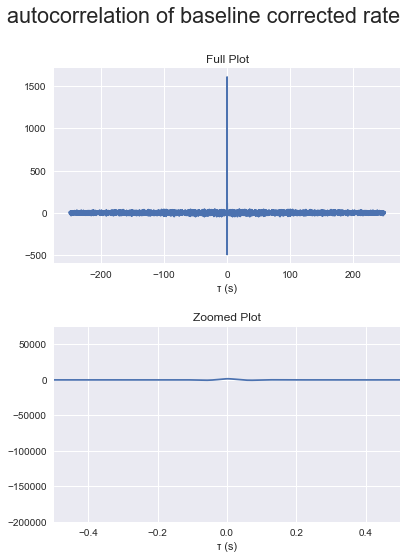

In [12]:
r_est_corr = plot_autocorrelation(a_corr, T, norm_val=del_t/T, ylims=(-200e3, 75e3), xlims=[-0.5, 0.5], title='autocorrelation of baseline corrected rate')

(d)

In [13]:
def generate_inhomogeneous_poisson(rates, del_t):    

    max_rate = np.max(rates)
    prob = rates * del_t
    spikes = np.random.uniform(size = rates.shape[0])
    return (spikes < prob).astype(int)    

In [14]:
poisson = generate_inhomogeneous_poisson(r_est, del_t)
print('firing rates of poisson spike train: {}'.format(np.sum(poisson)/T))

firing rates of poisson spike train: 147.984


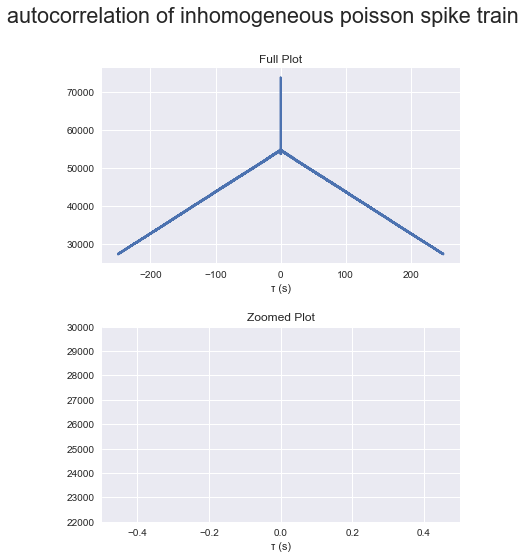

In [15]:
qpp = plot_autocorrelation(poisson, T, ylims=(22e3, 30e3), xlims=(-0.5, 0.5), title='autocorrelation of inhomogeneous poisson spike train')

Discussion:

Both of the autocorrelation of the spike train and the estimated firing rates shows similar pattern, in which the correlation value around the peak are negative/smaller compared to the average. For completely uncorrelated firing rates and spike train, the autocorrelation values whould be zero except for tau =0. therefore the two graphs indicates that the spike train is not completely uncorrelated.

(e)

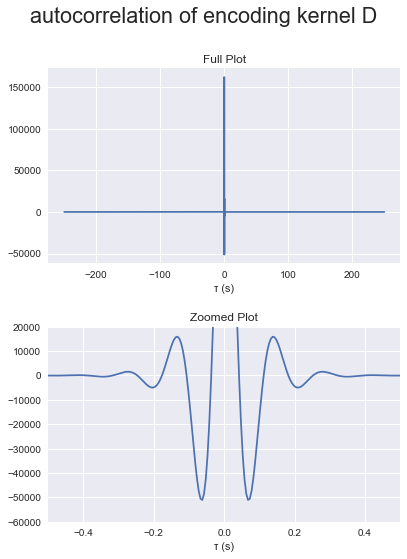

In [16]:
d_corr = plot_autocorrelation(d_kern, T, ylims=(-60e3, 20e3), xlims=(-0.5, 0.5), title='autocorrelation of encoding kernel D')

Discussion:

the autocorrelation of the kernel D also has the same figure as the previous autocorrelation of spike train and the the estimated firing rate. it is obvious since basically we estimate the firing rate by convolving the stimulus by the encoding kernel.  

(f)

In [17]:
k, k_time, s_est, s_est_time = estimate_decoder(t, white_stim, r_est, del_t)

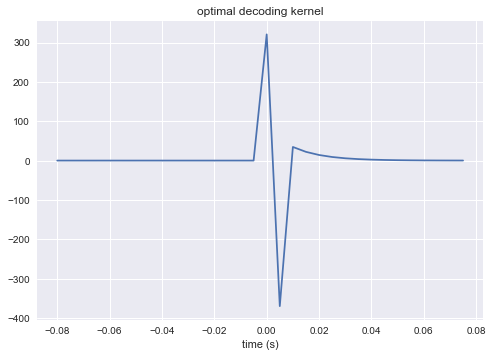

In [18]:
mid = int(k_time.shape[0]/2)
num_n = 16

plt.plot(k_time[mid-num_n:mid+num_n], k[mid-num_n:mid+num_n])
plt.title('optimal decoding kernel')
plt.xlabel('time (s)')
plt.show()


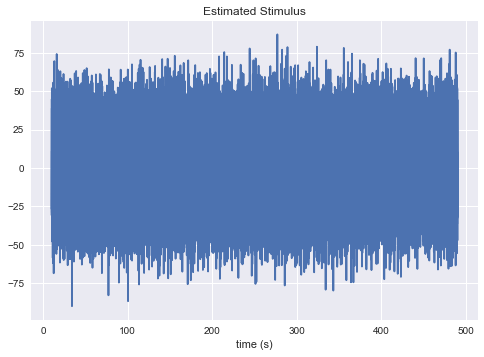

In [19]:
plt.plot(s_est_time, s_est)
plt.title('Estimated Stimulus')
plt.xlabel('time (s)')
plt.show()

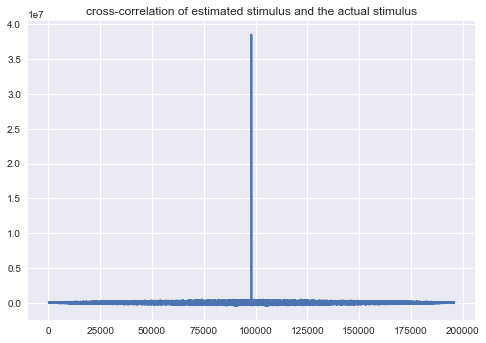

In [20]:
s_corr = np.correlate(s_est, white_stim, mode='full')

plt.plot(s_corr)
plt.title('cross-correlation of estimated stimulus and the actual stimulus')
plt.show()

Discussion:

The cross correlation of the estimated stimulus and the actual stimulus is highly correlated at tau = 0. this denoting that the estimated stimulus succesfully estimated.

(g)

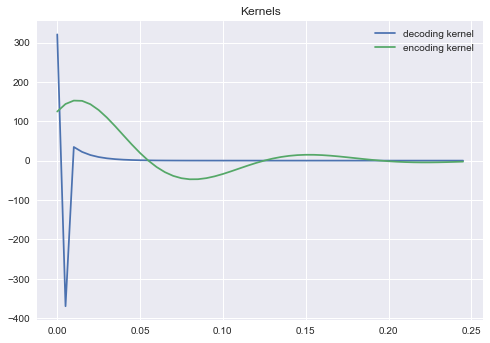

In [21]:
mid = int(k_time.shape[0]/2)

plt.plot(k_time[mid:mid+50], k[mid:mid+50], label='decoding kernel')
plt.plot(t[:50], d_kern[:50], label='encoding kernel')

plt.title('Kernels')
plt.legend()

plt.show()